In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

from itertools import product
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
#from pyramid.arima import auto_arima

In [2]:
df = pd.DataFrame({})
for i in range(1,8):
    df_new = pd.read_csv('/media/mayur/Softwares/BE Project/ProcessedDataset/November/sms-call-internet-mi-2013-11-0{}.csv'.format(i), parse_dates=['activity_date'])
    df = df.append(df_new)
    print("File " + str(i) + " added")

File 1 added
File 2 added
File 3 added
File 4 added
File 5 added
File 6 added
File 7 added


In [3]:
df['activity_hour'] += 24*(df.activity_date.dt.day-1)
df.head()

,square_id,activity_date,activity_hour,total_activity
0,NaN,NaT,NaN,NaN
1,1.0,2013-11-01,0.0,2.318359
2,1.0,2013-11-01,1.0,0.879858
3,1.0,2013-11-01,2.0,2.075716
4,1.0,2013-11-01,3.0,0.897144


# Plot the series

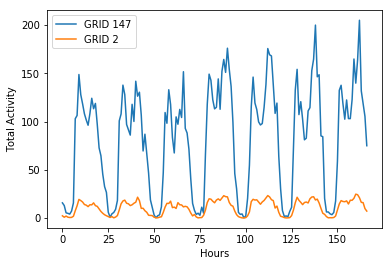

In [4]:
ax = df[df.square_id==147].plot(x='activity_hour', y='total_activity', label='GRID 147')
df[df.square_id==2].plot(ax=ax, x='activity_hour', y='total_activity', label='GRID 2')
plt.xlabel("Hours")
plt.ylabel("Total Activity")
plt.show()

## Series transformation

Text(0.5, 1.0, 'Grid 147 - Week 1 data')

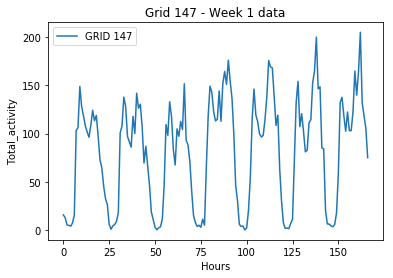

In [ ]:
df_grid = df[df['square_id']==147]
#df_grid.set_index('activity_hour', inplace=True) 
df_grid.drop(['square_id', 'activity_date'], axis=1, inplace=True)
#df_grid.to_csv('ts-grid-147.csv', index=False, encoding='utf-8')

#Plot the data
ax = df_grid.plot(x='activity_hour', y='total_activity', label='GRID 147')
plt.xlabel('Hours')
plt.ylabel('Total_activity')
plt.title('Grid 147 - Week 1 data')

# Split dataset into train and test

In [ ]:
train = df_grid[:125]
print('Train')
train.head()

Train


,activity_hour,total_activity
3505,0.0,15.760494
3506,1.0,12.967936
3507,2.0,5.412327
3508,3.0,4.908972
3509,4.0,4.122123


In [ ]:
test = df_grid[125:]
print('Test')
test.head()

Test


,activity_hour,total_activity
3510,125.0,11.213219
3511,126.0,70.922871
3512,127.0,132.669026
3513,128.0,154.174371
3514,129.0,107.239388


# Plot Train-Test data

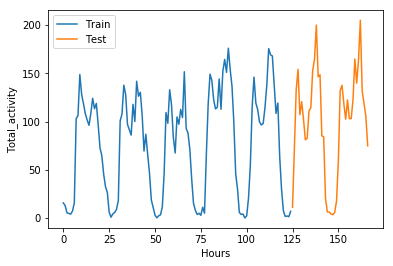

In [ ]:
ax = train.plot(x='activity_hour', y='total_activity', label='Train')
test.plot(ax=ax, x='activity_hour', y='total_activity', label='Test')
plt.xlabel('Hours')
plt.ylabel('Total_activity')
plt.show()

# Decompose the series

In [ ]:
train = train.set_index('activity_hour')    #Run this line once
test = test.set_index('activity_hour')
train.head()
#decomposition = seasonal_decompose(df_grid, model='multiplicative')	#try 'additive'
#decomposition = sm.tsa.seasonal_decompose(df_grid, model='additive')
#fig = decomposition.plot()
#plt.show()

,total_activity
activity_hour,
0.0,15.760494
1.0,12.967936
2.0,5.412327
3.0,4.908972
4.0,4.122123


# Fit Arima model

In [ ]:
'''
ARIMA model

parameters_list - list with (p, q, P, Q)
    p - associated with the auto-regressive aspect of the model
    d - integration order in ARIMA model (effects the amount of differencing to apply to a time series)
    D - seasonal integration order 
    
'''

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in pdq]

In [ ]:
# AIC Scores
# Akaike information criterion (AIC) (Akaike, 1974) 
# is a fined technique based on in-sample fit 
# to estimate the likelihood of a model to predict/estimate the future values. 
# A good model is the one that has minimum AIC among all the other models.

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}24 - AIC:{}'.format(param, param_seasonal, results.aic))
        
        except:
            continue

/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 0, 24)24 - AIC:1480.0947235401807


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 24)24 - AIC:1125.2760772418458
ARIMA(0, 0, 0)x(0, 1, 0, 24)24 - AIC:915.2416529340121


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(0, 1, 1, 24)24 - AIC:698.6271914041397
ARIMA(0, 0, 0)x(1, 0, 0, 24)24 - AIC:925.1687344463326


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 24)24 - AIC:892.3593044171403
ARIMA(0, 0, 0)x(1, 1, 0, 24)24 - AIC:708.2271274481318


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 24)24 - AIC:700.6219691588806
ARIMA(0, 0, 1)x(0, 0, 0, 24)24 - AIC:1344.9878885669032


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 24)24 - AIC:1035.3881624674195
ARIMA(0, 0, 1)x(0, 1, 0, 24)24 - AIC:890.8870863818038


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(0, 1, 1, 24)24 - AIC:675.4304882356914


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 24)24 - AIC:909.3652129353095


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 24)24 - AIC:871.365761158487


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 0, 24)24 - AIC:695.4002511827875


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 24)24 - AIC:677.3849423597782
ARIMA(0, 1, 0)x(0, 0, 0, 24)24 - AIC:1149.4669977468247


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 24)24 - AIC:913.3497623290789
ARIMA(0, 1, 0)x(0, 1, 0, 24)24 - AIC:904.5340376056413


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 24)24 - AIC:675.609533395962
ARIMA(0, 1, 0)x(1, 0, 0, 24)24 - AIC:895.6115675364166


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 24)24 - AIC:878.8950854333209
ARIMA(0, 1, 0)x(1, 1, 0, 24)24 - AIC:694.6089004183158


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 24)24 - AIC:677.4684442521652
ARIMA(0, 1, 1)x(0, 0, 0, 24)24 - AIC:1139.8781307136194


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 24)24 - AIC:907.2125568723545
ARIMA(0, 1, 1)x(0, 1, 0, 24)24 - AIC:868.5199204358568


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 24)24 - AIC:655.981077882278
ARIMA(0, 1, 1)x(1, 0, 0, 24)24 - AIC:884.3596437719631


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 24)24 - AIC:856.2990893250702


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 24)24 - AIC:676.8273797015121


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 24)24 - AIC:657.7678167006816
ARIMA(1, 0, 0)x(0, 0, 0, 24)24 - AIC:1157.4665514540793


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 24)24 - AIC:921.593493142329
ARIMA(1, 0, 0)x(0, 1, 0, 24)24 - AIC:887.0676978455107


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 24)24 - AIC:669.1113000073271
ARIMA(1, 0, 0)x(1, 0, 0, 24)24 - AIC:887.7453580249729


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 24)24 - AIC:868.2822589442401


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 24)24 - AIC:676.4791753755467


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 24)24 - AIC:670.8517197934582
ARIMA(1, 0, 1)x(0, 0, 0, 24)24 - AIC:1147.4040068517595


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 24)24 - AIC:914.8587640446613
ARIMA(1, 0, 1)x(0, 1, 0, 24)24 - AIC:873.1903625452574


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 24)24 - AIC:659.7254499459196
ARIMA(1, 0, 1)x(1, 0, 0, 24)24 - AIC:881.4028855822512


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 24)24 - AIC:858.2383857851944


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 0, 24)24 - AIC:673.7344196414184


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 24)24 - AIC:661.7145552326538
ARIMA(1, 1, 0)x(0, 0, 0, 24)24 - AIC:1146.5426497602487


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 24)24 - AIC:915.3402333806602
ARIMA(1, 1, 0)x(0, 1, 0, 24)24 - AIC:885.781887474212


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 24)24 - AIC:664.9047402073512
ARIMA(1, 1, 0)x(1, 0, 0, 24)24 - AIC:879.0324086958169


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 24)24 - AIC:866.3437765983762


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 0, 24)24 - AIC:672.7586723735636


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 24)24 - AIC:666.9046308072506
ARIMA(1, 1, 1)x(0, 0, 0, 24)24 - AIC:1137.5974347973115


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 24)24 - AIC:908.9399121992943


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 24)24 - AIC:869.9396104069589


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 24)24 - AIC:655.3422214302738


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 0, 24)24 - AIC:879.9249005850119


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 24)24 - AIC:856.49071923604


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 24)24 - AIC:668.9237786658224


/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 24)24 - AIC:657.2690875784564


In [ ]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

/home/mayur/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
# setting initial values and some bounds for them
#ps = qs = range(2, 5)
ps = qs = Ps = Qs = range(0, 2)
d = 1
D = 1
s = 24 # season length is 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

In [ ]:
'''
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return df with parameters and corresponding AIC
        
        parameters_list - (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in parameters_list:
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(train, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table
    
result_table = optimizeSARIMA(parameters_list, d, D, s)
print(result_table)'''

In [ ]:
best_model = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 24),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()

print(best_model.summary())

In [ ]:
def plotSARIMA(series, model, n):

    data = series.copy()
    #print(data.head())

    #data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    
    forecast = pd.DataFrame(model.predict(start=data.shape[0], end=data.shape[0]+n))
    #forecast.to_csv('forecast1.csv', index='activity_hour', encoding='utf-8',header=False)
    forecast.to_csv('forecast1.csv', encoding='utf-8',header=False)
    #colnames = ['activity_hour', 'total_activity']
    #forecast = pd.read_csv('forecast1.csv', names=colnames, header=None)
    
    #forecast = forecast.set_index('activity_hour')
    
    train.to_csv('train.csv', index='activity_hour', encoding='utf-8')
    test.to_csv('test.csv', index='activity_hour', encoding='utf-8')
    #print(forecast.head(3))
    #print(test.head())
    #print(train.head())
    
    #ax = train.plot(x='activity_hour', y='total_activity', label='train')
    #test.plot(ax=ax, x='activity_hour', y='total_activity', label='test')
    #forecast.plot(ax=ax, x='activity_hour', y='total_activity', label='model')
    #plt.figure(figsize=(50, 30))
    #plt.show()
    
    
            
plotSARIMA(train, best_model, 41)